In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
from torch.autograd import Variable
import matplotlib.pyplot as plt

%mptplotlib inline
iPython 에서 제공되는 Rich output 명령 구문임
Rich output : 도표, 그림, 소리, 애니메이션 같은 결과물을 말함
jupyter notebook 을 실행한 브라우저에서 바로 그림을 볼 수 있게 해 주는 것임

In [ ]:
# 선형으로 분석할 수 없는 데이터를 생성
# 나선형 데이터 세트를 샘플로 생성함
N = 100 # number of points per class
D = 2 # dimensionallity
K = 3 # number of classes
X = np.zeros((N * K, D))  # data matrix (each row = single example)
Y = np.zeros(N * K, dtype='uint8') # class labels

for j in range(K):
  ix = range(N*j, N * (j + 1))  # radius
  r = np.linspace(0.0, 1, N)
  t = np.linspace(j * 4, (j + 1) * 4, N) + np.random.randn(N) * 0.2  # theta
  X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
  Y[ix] = j

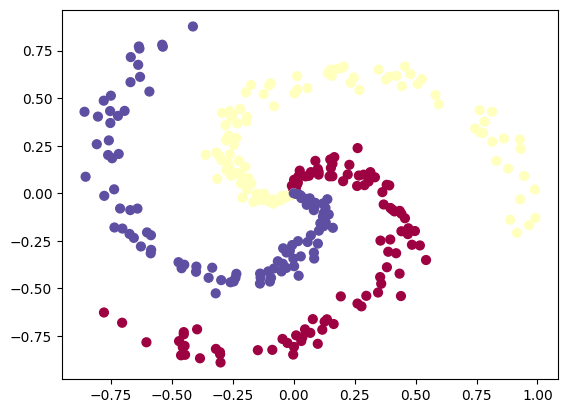

In [ ]:
# let visualize the data :
plt.scatter(X[:, 0], X[:,1], c=Y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [ ]:
# Softmax 선형 분류기로 학습
num_epoch = 10000

x = torch.from_numpy(X).type_as(torch.FloatTensor())
y_ = torch.from_numpy(Y).type_as(torch.LongTensor())

print(x.size(), y_.size())

torch.Size([300, 2]) torch.Size([300])


In [ ]:
# model design
model = nn.Sequential(
    nn.Linear(2,20),
    nn.ReLU(),
    nn.Linear(20, 10),
    nn.ReLU(),
    nn.Linear(10,5),
    nn.ReLU(),
    nn.Linear(5,5),
    nn.ReLU(),
    nn.Linear(5,3),
).cuda()

# 손실함수
loss_func = nn.CrossEntropyLoss()
# 최적화함수
optimizer = optim.Adam(model.parameters(), lr=0.001)

label = y_.cuda()

In [ ]:
# 학습시키기
for i in range(num_epoch):
  optimizer.zero_grad()
  output = model(Variable(x.cuda()))
  loss = loss_func(output, Variable(label))
  loss.backward()
  optimizer.step()

  if i % 100 == 0:
    print(loss)

tensor(1.1124, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0487, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8651, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.6434, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3746, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2294, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1614, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1099, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0751, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0514, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0369, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0297, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0260, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0235, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0217, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0203, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0191, device='cuda:0', grad_fn=